#### fish 길이에 따른 무게 예측
- 데이터셋 : fish.csv
- 학습종류 : 지도학습 / 회귀Regression - 값을 예측
- 알고리즘 : 분석 후 결정
- 피쳐 : 길이length
- 타겟: 무게weight



[1] 모듈 로딩 및 데이터 준비

In [ ]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화

from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 

[2] 데이터분석 -탐색적 분석

In [3]:
## 데이터준비

data_file = '../data/fish.csv'
fishhDF = pd.DataFrame(pd.read_csv(data_file, header=None, 
                                   skiprows=73, skipfooter=31,
                                   usecols=[1,2], engine='python'))
fishhDF.head()
## 1 = length
## 2 = weight

,1,2
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4


[2] 데이터분석 -탐색적 분석

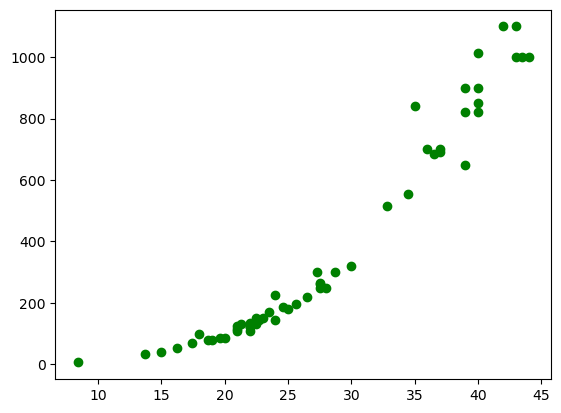

In [4]:
## 무게와 길이의 분포
plt.plot(fishhDF[2], fishhDF[1],'og')
plt.show()

- 탐색적 데이터 분석 결과
    - 데이터 분포 분석: 길이에 따른 무게가 증가하는 양상 보임
    - 주의 


[3] 데이터셋 준비
- 피처와 타겟 분리
- 학습용/검증용/테스트용 데이터셋 분리 => 학습용과 테스트용으로만 분리

In [5]:
## 3-1 피처와 타겟 분리
featureDF = fishhDF[[2]]
targetSR = fishhDF[1]
print(f"featureDF => {featureDF.ndim}D, targetSR => {targetSR.ndim}D")

featureDF => 2D, targetSR => 1D


In [6]:
## 3-2 데이터셋 분리 => 학습용 : 테스트용 75:25 (default ratio)
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size =0.25,
                                                    random_state=5)
print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (42, 1) / X_test => 2D, (14, 1)
y_train => 1D (42,) / y_test => 2D, (14,)


In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error

In [8]:
## [4-1] 알고리즘 객체 생성
model = KNeighborsRegressor()

In [9]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [13]:
print(model.n_features_in_)
print(model.n_samples_fit_)
# print(model.feature_names_in_)
print(model.effective_metric_)
#거리 재는 방법

1
42
euclidean


In [18]:
X_train.index[:3]

Index([17, 33, 4], dtype='int64')

In [22]:
## 4-3 훈련데이터 셋으로 예측 -=> predict(2d)
## - 생성길이에 대한 무게 예측 결과
pre_weight = model.predict(X_train)
pre_weight

array([ 123.  ,  263.6 ,   84.  ,  138.  ,   57.58,   84.  , 1004.  ,
        684.2 ,  749.  ,  263.6 , 1004.  ,  172.  ,  185.6 ,  123.  ,
        808.  ,  161.6 ,  123.  ,  243.  ,  145.  ,  138.  ,  808.  ,
         57.58,  123.  ,  123.  ,  808.  ,  808.  , 1004.  ,  123.  ,
        123.  ,   84.  , 1004.  ,  263.6 ,  185.6 ,  684.2 ,  284.  ,
         95.  ,  104.  ,  123.  ,  684.2 ,  808.  ,  123.  ,  284.  ])

In [ ]:
## 모델 성능 평가 ==> score(2D_feature, 1D_target) : 모델 적합도
score = model.score(X_train, y_train)

## 손실 계산값 ==> rmse, mse, mae...(1d_타겟, 1d_predict)
rmse = root_mean_squared_error(y_train, pre_weight)
rmse

50.671077220310465

[5]최근접이웃 알고리즘의 동작원리 확인
- k개만큼 가까이 있는 데이터를 추출
- 회귀


In [46]:
#데이터 지정
X_train.head()

,2
17,22.0
33,27.5
4,17.4
21,22.7
0,8.4


In [45]:
y_train.head()

17    135.0
33    250.0
4      70.0
21    145.0
0       5.9
Name: 1, dtype: float64

In [50]:
## 인덱스 리셋
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

print(f"X_train => {X_train.ndim}D {X_train.shape} / X_test => {X_test.ndim}D, {X_test.shape}")
print(f"y_train => {y_train.ndim}D {y_train.shape} / y_test => {X_test.ndim}D, {y_test.shape}")

X_train => 2D (42, 1) / X_test => 2D, (14, 1)
y_train => 1D (42,) / y_test => 2D, (14,)


In [51]:
#데이터지정
X_train.iloc[0], y_train[0]

(2    22.0
 Name: 0, dtype: float64,
 np.float64(135.0))

In [69]:
distance, indices = model.kneighbors([[17]])
print(distance, indices)

[[0.4 1.  2.  2.6 3. ]] [[ 2  5 29 35 36]]


In [72]:
indices = indices.reshape(-1)

In [76]:
y_train[indices]

2      70.0
5     100.0
29     80.0
35     85.0
36     85.0
Name: 1, dtype: float64

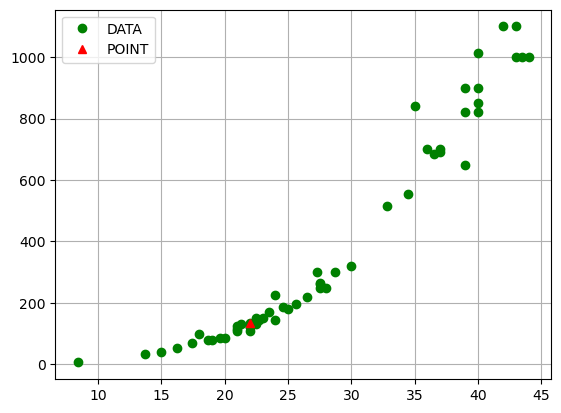

In [ ]:
## 무게와 길이의 분포
plt.plot(fishhDF[2], fishhDF[1],'og', label = 'DATA')
plt.plot(X_train.iloc[0], y_train[0], '^r', label = 'POINT')
# plt.plot(X_train.iloc[0], y_train[indices], '^r', label = 'POINT')

plt.legend()
plt.grid()
plt.show()